In [17]:
#Prime numbers generation to avoid to sample l multiples of p
from search import create_set_constraints

from sympy import nextprime

primes = []
x = nextprime(1000)
while x < 100000:
    primes.append(x)
    x = nextprime(x)

print(primes)

[1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 1223, 1229, 1231, 1237, 1249, 1259, 1277, 1279, 1283, 1289, 1291, 1297, 1301, 1303, 1307, 1319, 1321, 1327, 1361, 1367, 1373, 1381, 1399, 1409, 1423, 1427, 1429, 1433, 1439, 1447, 1451, 1453, 1459, 1471, 1481, 1483, 1487, 1489, 1493, 1499, 1511, 1523, 1531, 1543, 1549, 1553, 1559, 1567, 1571, 1579, 1583, 1597, 1601, 1607, 1609, 1613, 1619, 1621, 1627, 1637, 1657, 1663, 1667, 1669, 1693, 1697, 1699, 1709, 1721, 1723, 1733, 1741, 1747, 1753, 1759, 1777, 1783, 1787, 1789, 1801, 1811, 1823, 1831, 1847, 1861, 1867, 1871, 1873, 1877, 1879, 1889, 1901, 1907, 1913, 1931, 1933, 1949, 1951, 1973, 1979, 1987, 1993, 1997, 1999, 2003, 2011, 2017, 2027, 2029, 2039, 2053, 2063, 2069, 2081, 2083, 2087, 2089, 2099, 2111, 2113, 2129, 2131, 2137, 2141, 2143, 2153, 2161, 2179, 2203, 2207, 2213, 2221, 2237, 2239, 2243, 225

In [18]:
import numpy as np
import pandas as pd
from random import randint, choices

def test_matthieu(constraints, bounds_p=(3, 33)):
    l = len(list(constraints.keys()))
    sample = choices(primes, k=l)
    possible_p = set(range(*bounds_p, 2))
    for i, set_constraints in constraints.items():
        for line in set_constraints:
            if not possible_p:
                break
            line =  np.array(list(line) + [ 0 for _ in range(l - i - 1) ])
            r = np.dot(line, sample)
            for p in possible_p:
                to_remove = set()
                if r % p == 0:
                    to_remove.add(p)
                possible_p = possible_p.difference(to_remove)
    if possible_p:
        return min(possible_p), sample
    else:
        return [], sample




def get_data_point(constraints, bounds_p=(3, 33)):
    i = 0
    a = test_matthieu(constraints, bounds_p)
    while not a[0]:
        a = test_matthieu(constraints, bounds_p)
        i += 1
    p, sample = a
    return (i, p)



def full_heuristic_function(function, l, N = 10000, bounds_p=(3, 33)):
    constraints = create_set_constraints(function, l)
    result = []
    for c in range(N):
        i, p = get_data_point(constraints, bounds_p)
        result.append([i, p])
    return pd.DataFrame(np.array(result), columns=["iterations", "p"])


In [19]:
def mux(x):
    return x[0] & x[1] ^ x[2] ^ x[3] ^ x[4]


result_mux = full_heuristic_function(mux, 5, N=10000)


In [32]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# metrics

def p_frequencies(result):
    fq = result["p"].value_counts()
    fq = fq.reset_index()
    return fq
    

def i_necessary(result):
    p_values = result["p"].unique()
    pd_avg = []
    for p in p_values:
        index = result[result["p"] == p].index[0]
        pd_avg.append([p, result["iterations"][:index].sum()])
    return pd.DataFrame(np.array(pd_avg), columns=["p", "avg_iter"])


def number_of_iterations_before_finding_optimal(result, optimal):
    sum = 0
    for row in result.itertuples():
        sum += row.iterations
        if row.p == optimal:
            break
    return sum


import seaborn as sns
import matplotlib.pyplot as plt

def plot_p_frequencies(result):
    fq = p_frequencies(result)
    sns.barplot(data=fq, x="p", y="count")
    plt.title("Number of outputs equals to p")
    plt.show()


def plot_i_necessary(result):
    pd_avg = i_necessary(result)
    sns.barplot(data=pd_avg, x="p", y="avg_iter")
    plt.title("Average number of sample before finding a solution for a given p")
    plt.show()


     p  avg_iter
0   31         0
1   21        20
2   13        22
3   19        31
4   11        31
5   23        34
6   29        41
7   17        46
8   25        85
9   27        86
10  15       139
11   9       157


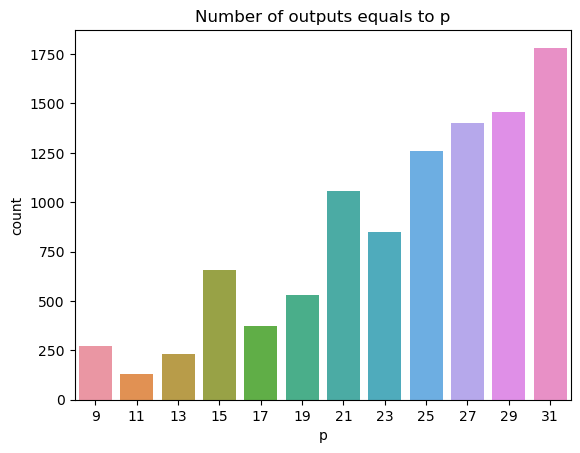

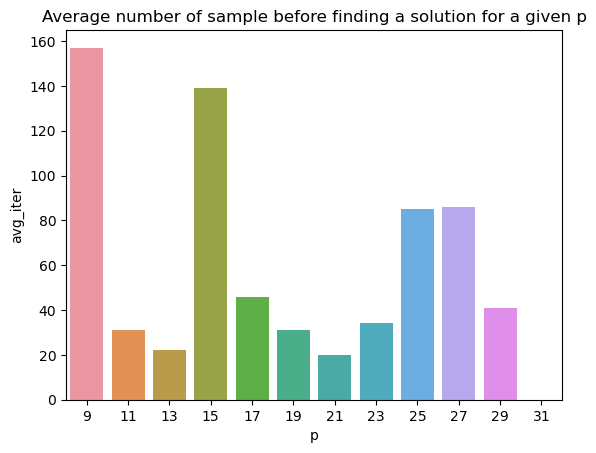

162


In [33]:
plot_p_frequencies(result_mux)
plot_i_necessary(result_mux)

print(number_of_iterations_before_finding_optimal(result_mux, 9))


In [22]:
import pickle


with open("ascon_s_boxes_binary.pickle", "rb") as f:
    sboxes = pickle.load(f)


ascon_generic = [lambda input: sboxes[0][j][sum([x * (1 << i) for i, x in enumerate(input)])] for j in range(5)]


result_ascon = [full_heuristic_function(ascon_generic[i], 5, 10000) for i in range(5)]



i = 0


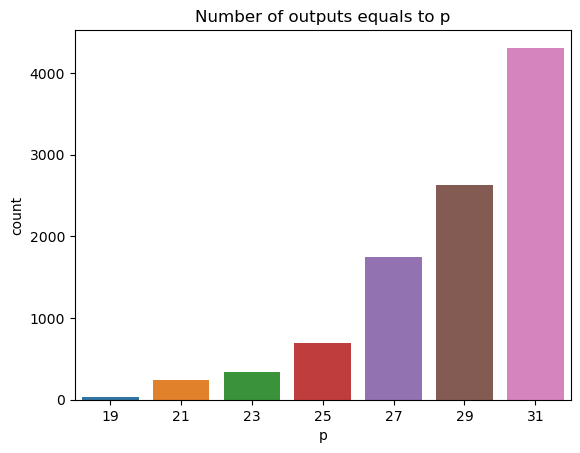

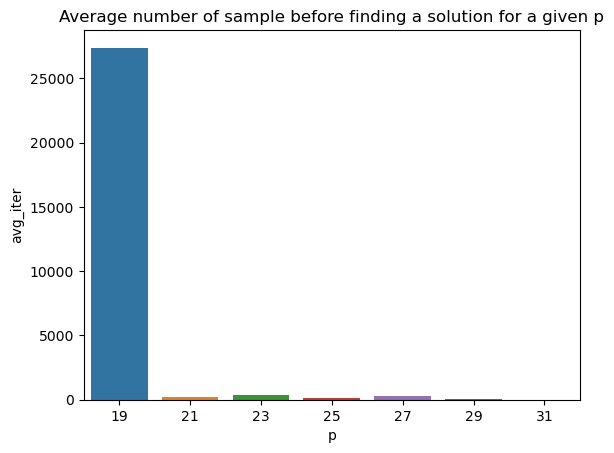

286462
i = 1


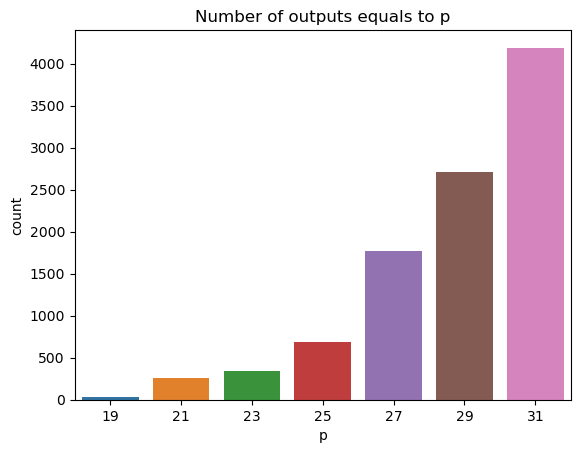

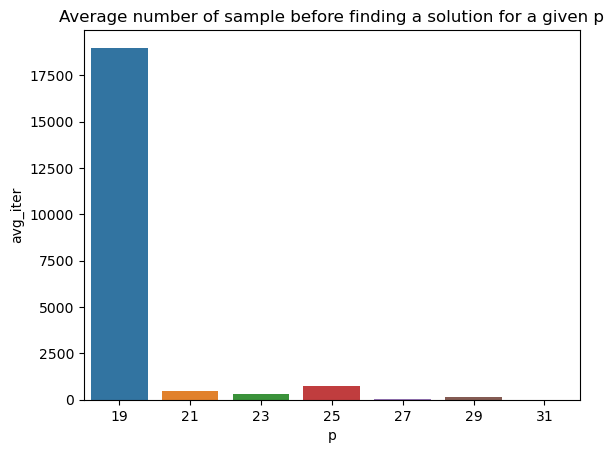

288334
i = 2


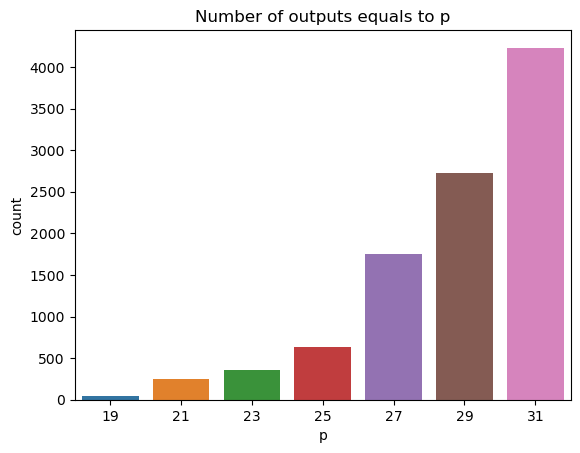

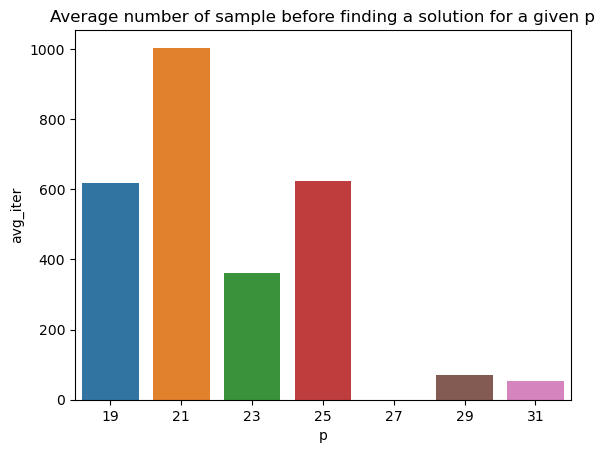

292674
i = 3


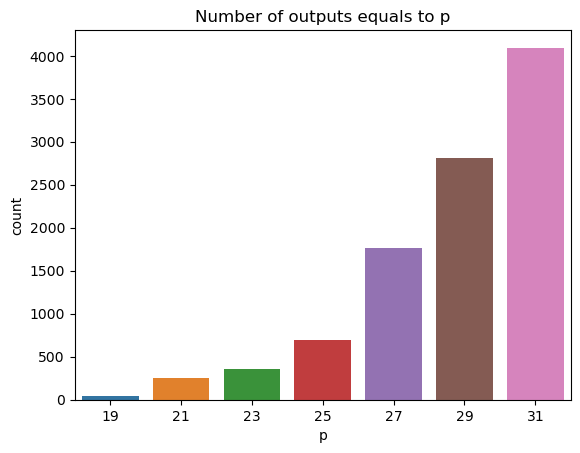

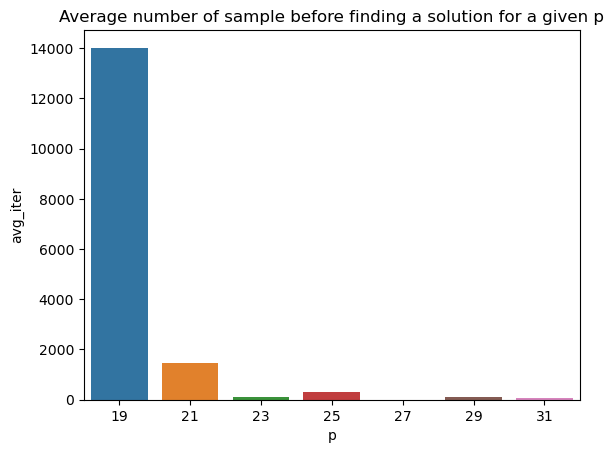

289195
i = 4


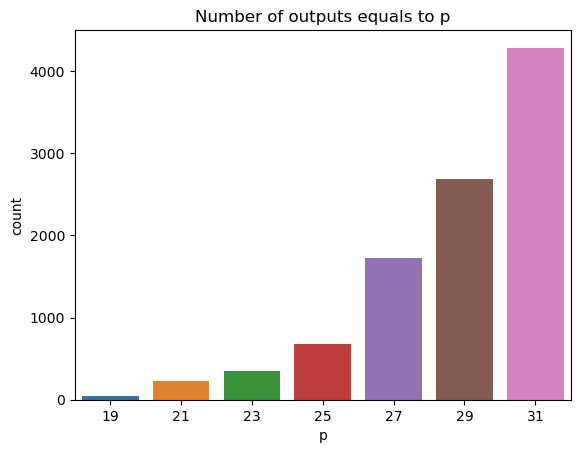

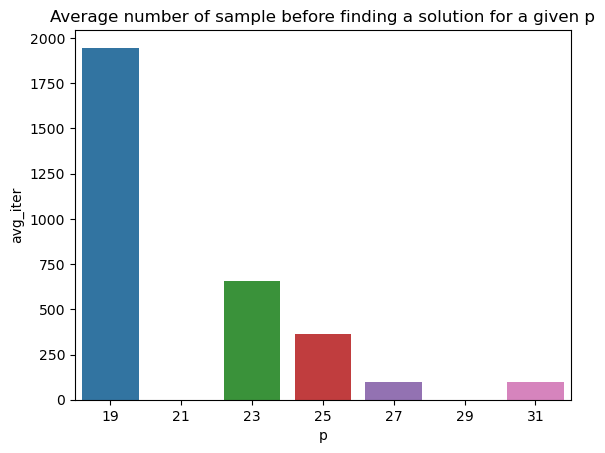

290790


In [34]:
true_p = [17, 7, 7, 15, 11]

for i in range(5):
    print(f"i = {i}")
    plot_p_frequencies(result_ascon[i])
    plot_i_necessary(result_ascon[i])

    print(number_of_iterations_before_finding_optimal(result_ascon[i], true_p[i]))

# heuristic on subtree of Boyar s-box

In [ ]:
import pickle

with open("truth_table_t21", "rb") as f:
    truth_table = pickle.load(f)


fn_t21 = lambda x : truth_table[sum([x[i] << i for i in range(9)])]


full_heuristic_function(fn_t21, 9, N=1)

KeyboardInterrupt: 